# **India vs England in Tests: Who Dominated the Series?**

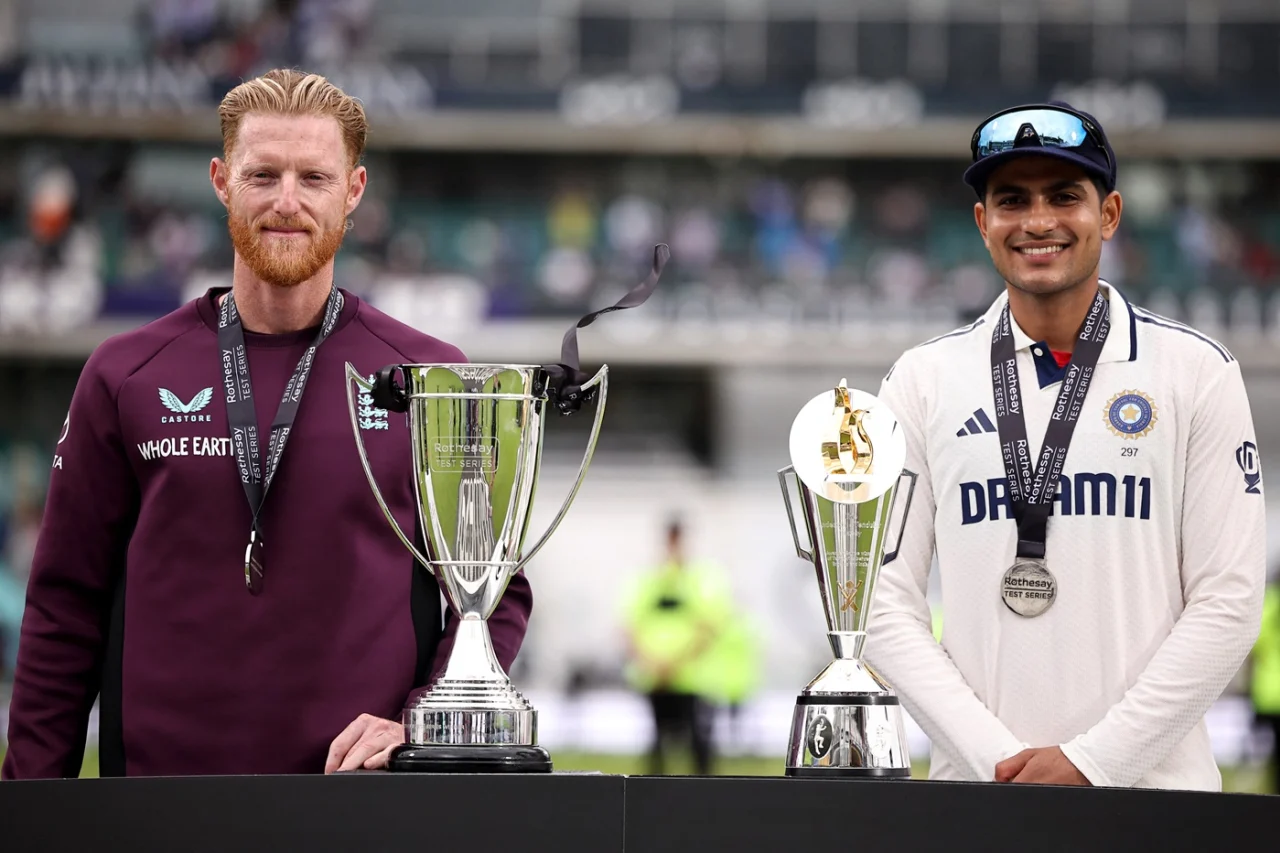

In [1]:
!pip install -q pandasai pandasai-openai

In [2]:
!pip install numpy==1.26.4

In [3]:
openai_api_key="<OPENAI-API-KEY>"

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandasai_openai import OpenAI
import pandasai as pai

llm = OpenAI(api_token=openai_api_key)


pai.config.set({"llm": llm})

In [4]:
data = pai.read_csv("/content/ind vs eng.csv")

In [5]:
data.head()

,Player Name,Category,Team,Matches,Runs Scored,Highest Score,Batting Average,S/R,100s,50s,4s,6s,Overs Bowled,Runs conceded,Wickets,Bowling Average,Economy,Best Bowling Figure,4w,5w
0,Shubman Gill,BATTER,INDIA,10,754,269,75.40,65.56,4,0,85,12,0.0,0,0,0.0,0.0,0,0,0
1,Yashasvi Jaiswal,BATTER,INDIA,10,411,118,41.10,68.72,2,2,63,4,0.0,0,0,0.0,0.0,0,0,0
2,Dhruv Jurel,WICKETKEEPER-BATTER,INDIA,2,53,34,26.50,61.62,0,0,6,0,0.0,0,0,0.0,0.0,0,0,0
3,Karun Nair,BATTER,INDIA,8,205,57,25.62,52.56,0,1,29,0,0.0,0,0,0.0,0.0,0,0,0
4,KL Rahul,BATTER,INDIA,10,532,137,53.20,49.90,2,2,69,0,0.0,0,0,0.0,0.0,0,0,0


In [6]:
cricket = pai.create(
    path="cricket/indvseng",
    df = data,
    description="Dataset containing India and England cricket players data",
    columns = [
        {"name": "Player Name", "type": "string", "description": "Full name of the cricketer"},
        {"name": "Category", "type": "string", "description": "Role of the player (e.g., BATTER, BOWLER, ALL-ROUNDER, WICKETKEEPER-BATTER)"},
        {"name": "Team", "type": "string", "description": "Team the player belongs to (e.g., INDIA, ENGLAND)"},
        {"name": "Matches", "type": "integer", "description": "Number of matches played"},
        {"name": "Runs Scored", "type": "integer", "description": "Total runs scored by the player"},
        {"name": "Highest Score", "type": "integer", "description": "Highest individual score by the player"},
        {"name": "Batting Average", "type": "float", "description": "Average number of runs scored per dismissal"},
        {"name": "S/R", "type": "float", "description": "Batting strike rate (runs per 100 balls faced)"},
        {"name": "100s", "type": "integer", "description": "Number of centuries (scores of 100 or more)"},
        {"name": "50s", "type": "integer", "description": "Number of half-centuries (scores between 50 and 99)"},
        {"name": "4s", "type": "integer", "description": "Number of boundaries (fours) hit"},
        {"name": "6s", "type": "integer", "description": "Number of sixes hit"},
        {"name": "Overs Bowled", "type": "float", "description": "Total overs bowled by the player"},
        {"name": "Runs conceded", "type": "integer", "description": "Total runs conceded while bowling"},
        {"name": "Wickets", "type": "integer", "description": "Total number of wickets taken"},
        {"name": "Bowling Average", "type": "float", "description": "Average runs conceded per wicket taken"},
        {"name": "Economy", "type": "float", "description": "Average runs conceded per over"},
        {"name": "Best Bowling Figure", "type": "string", "description": "Best bowling performance in a match (e.g., '5/30')"},
        {"name": "4w", "type": "integer", "description": "Number of times the player took 4 wickets in an innings"},
        {"name": "5w", "type": "integer", "description": "Number of times the player took 5 wickets in an innings"}
    ]
)

Dataset saved successfully to path: cricket/indvseng


In [7]:
cricket_data = pai.load("cricket/indvseng")

Dataset loaded successfully.


In [11]:
def handle_response(response):
    if response.type == 'chart':
        chart_path = response.value
        if os.path.exists(chart_path):
            img = mpimg.imread(chart_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title("Chart Output")
            plt.show()
        else:
            print(f"Chart file not found: {chart_path}")

    elif response.type == 'dataframe':
        df = pd.DataFrame(response.value)
        print(df)

    elif response.type == 'string':
        print(response.value)

    else:
        print("Unknown response type:")
        print(response)


In [12]:
value=pai.chat("Tell me who is best batsman",cricket_data)
handle_response(value)

The best batsman is Shubman Gill with a batting average of 75.4.


In [13]:
value=data.chat("Tell me who is best batsman")
handle_response(value)

The best batsman is Shubman Gill with a batting average of 75.4.


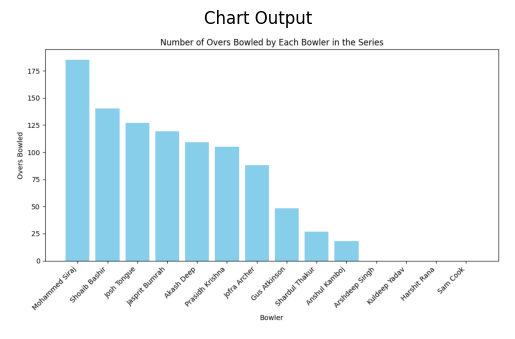

In [17]:
value=data.chat("Give me bar graph ploting which bowler bowled most number of over in the series")
handle_response(value)

In [15]:
val=data.chat("What is the batting average of each Indian player?")
handle_response(val)

           Player Name  Batting Average
0   Abhimanyu Easwaran             0.00
1           Akash Deep            20.00
2        Anshul Kamboj             0.00
3       Arshdeep Singh             0.00
4          Dhruv Jurel            26.50
5         Harshit Rana             0.00
6       Jasprit Bumrah             1.80
7             KL Rahul            53.20
8           Karun Nair            25.62
9        Kuldeep Yadav             0.00
10      Mohammed Siraj             4.00
11  Narayan Jagadeesan             0.00
12  Nitish Kumar Reddy            11.25
13     Prasidh Krishna             2.00
14     Ravindra Jadeja            86.00
15        Rishabh Pant            68.42
16       Sai Sudharsan            23.33
17      Shardul Thakur            15.33
18        Shubman Gill            75.40
19   Washington Sundar            47.33
20    Yashasvi Jaiswal            41.10


In [19]:
val=data.chat("give me top 3 batsman based on run, average, 100s and make comparative study")
handle_response(val)

Top 3 Batsmen based on Runs, Average and 100s:

 Player Name  Runs Scored  Batting Average  100s
Shubman Gill          754            75.40     4
    Joe Root          537            67.12     3
    KL Rahul          532            53.20     2
 Harry Brook          481            53.44     2

Comparative Study:
- The batsman with highest runs scored is Shubman Gill with 754 runs.
- The highest batting average among them is 75.4 by Shubman Gill.
- The most centuries (100s) scored is 4 by Shubman Gill.
- This shows a good overlap of top performers across different metrics, highlighting consistent high performance in runs, average and centuries.


In [22]:
val=data.chat("Which team is better when it's comes to bowling unit and ignore the match count and just compare other bowling statistics")
handle_response(val)

Bowling comparison:
   Team  Total_Wickets  Avg_Bowling_Average  Avg_Economy  Total_4w  Total_5w
  INDIA           67.0            48.826667       4.4350       4.0       5.0
ENGLAND           53.0            32.952500       3.5925       1.0       2.0

Scores based on bowling stats: {'INDIA': 3, 'ENGLAND': 2}
Better bowling unit: INDIA


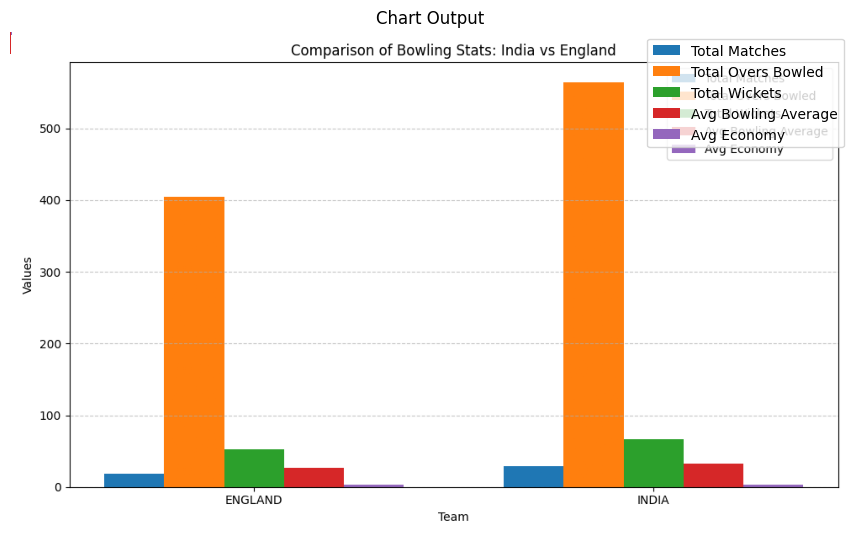

In [26]:
val=data.chat("Give me chart between indian and england bowling team")
handle_response(val)

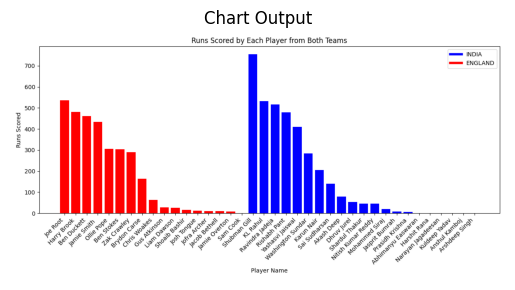

In [29]:
val=data.chat("give me bar graph plotting the runs scored by each player from both the team")
handle_response(val)

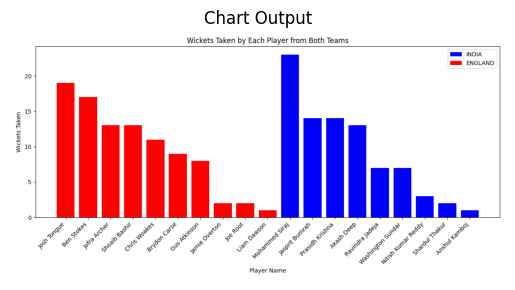

In [30]:
val=data.chat("give me bar graph plotting the wickets taken by each player from both the team")
handle_response(val)

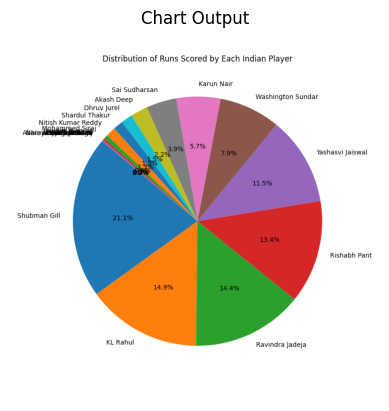

In [31]:
val=data.chat("plot a pie chart indicating the distribution of runs scored by each player to total score from Indian team")
handle_response(val)

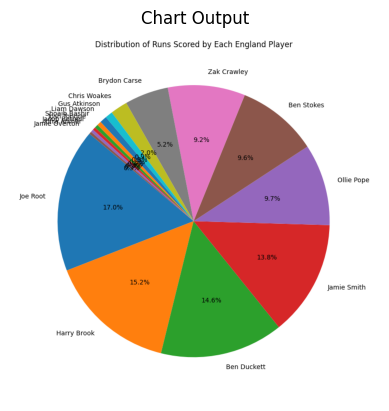

In [32]:
val=data.chat("plot a pie chart indicating the distribution of runs scored by each player to total score from England team")
handle_response(val)

In [35]:
val=data.chat("Based on the data, tell me which team would have won the overall championship.")
handle_response(val)

The overall championship winner based on combined batting and bowling performance is INDIA.


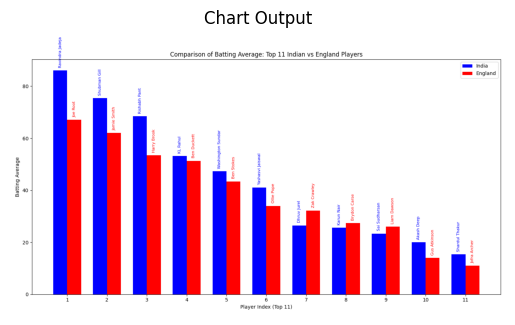

In [37]:
val=data.chat("give me chart for comparison of the batting average of each indian player with the england player and for simplicity take top 11 player from each team")
handle_response(val)

In [44]:
val=data.chat("Which player has done well with both bat and ball from both the team and give me comprative study")
handle_response(val)

         Player Name     Team  Matches  Runs Scored  Batting Average    S/R  \
0    Ravindra Jadeja    INDIA       10          516            86.00  55.06   
1  Washington Sundar    INDIA        8          284            47.33  48.38   
2           Joe Root  ENGLAND        9          537            67.12  56.88   
3         Ben Stokes  ENGLAND        8          304            43.42  52.32   

     s  s_1  Overs_Bowled  Wickets  Bowling Average  Economy  \
0  100   50         142.1        7            72.42     3.56   
1  100   50          74.1        7            38.57     3.64   
2  100   50          57.1        2           122.00     4.26   
3  100   50         140.0       17            25.23     3.06   

  Best Bowling Figure  
0               4/143  
1                4/22  
2                1/20  
3                5/72  


In [45]:
val=data.chat("Tell me about Indian team just summarizes their batting unit and bowling unit and give me a conclusion")
handle_response(val)

Batting Unit: 9 players, total runs scored 2574.0, average batting average 34.84, average strike rate 46.34, with 10.0 centuries and 9.0 half-centuries.
Bowling Unit: 9 players, bowled a total of 563.8 overs, took 67.0 wickets, with an average bowling average of 32.55 and economy rate of 2.96. They have 4.0 four-wicket hauls and 5.0 five-wicket hauls.
Conclusion: The Indian team has a strong batting lineup with high averages and multiple centuries, indicating consistent run-scoring ability. The bowling unit, though smaller in player count, shows effective wicket-taking capability with decent averages and economy rates, supported by several multi-wicket hauls. Overall, the team appears well balanced with solid performances in both departments.


In [46]:
val=data.chat("Tell me about England team just summarizes their batting unit and bowling unit and give me a conclusion")
handle_response(val)

England's batting unit consists of 6 players with an average batting average of 54.81. They have scored a total of 2510.0 runs, including 8.0 centuries and 12.0 half-centuries. The highest individual score is 184 and the average strike rate is 74.06.

The bowling unit has 5 players who have bowled a total of 404.1 overs and taken 53.0 wickets. The average bowling average is 32.95 with an economy rate of 3.59.

In conclusion, England's team shows a balanced combination of experienced batsmen and effective bowlers. The batting unit has solid averages and good scoring ability, while the bowling unit maintains decent averages and economy rates, indicating a well-rounded team capable of competing strongly in matches.
